# I. "Pray for stability!"

## Short reminder

<img src="http://drive.google.com/uc?export=view&id=1YMGXlSXZXWycURx2eYa0uHldRszeQP6v" width=50%>

If we know the rules, there is no need for data science. 

If we don't know the rules, what do we have?


## [Empirical risk minimization](https://en.wikipedia.org/wiki/Empirical_risk_minimization)

We are talking about **"empirical risk minimization"**, that is to say we have a **dataset** which we consider being drawn from an **underlying data distribution**, from which we would like to **learn something**. **We do not know the true, underlying distribution** (the true, underlying relationships), so we **estimate the model** that best represents the relationships presented in the **available empirical data**. In order to do so, _we minimize the "empirical risk", that is we select the model that performs best on the empirical data we have obtained._

In a sense machine learning is all about **generalization**, finding relationships from data that are generalizable and thus help us to make accurate **predictions**. When we talk about empirical risk minimization we consider how we can find the best model of underlying empirical data that we are considering. There will be other factors that determine whether a model generalizes well, that do not just directly apply to our data-set and we will come back to those throughout the course.

Empirical risk minimization, i.e. selecting a model that best describes relationships in a particular data set, requires us to **define what we take as performance of the model (i.e. "best")**. Any empirical risk minimization is with respect to the **performance metric** we have chosen for a model, and it is important to keep this in mind.

The **risk is then defined as the expectation of the loss function**, i.e. the error that the estimated function produces in terms of the relationships between variables. We are henceforth trying to minimize this error.

The expectation of the loss function **cannot usually be calculated**, as we do not know the true underlying relationship, however, we can calculate an **approximation, called empirical risk**.

_The empirical risk minimization principle states that the learning algorithm should chose the model (hypothesis) that minimizes the empirical risk._

Thus following the empirical risk minimization principle requires **solving an optimization problem**.

We typically measure the performance of our models in some kind of **error metric**, which reflects direct performance on the task (we will talk about this later in detail), but it is important to understand that regularly we will set more complex **"objectives"** for the model, that not just contain **some measure of cost, but also other boundary conditions** (complexity, conformance to some constraints, etc.), and during our **optimization process** we wish to find the best model for this objective.

At the end of the day the model only optimizes what objectives we have set for it and it is essential to understand the different assumptions we make when the learning process is defined. In a way crafting those assumptions to fit with the underlying problem is the key to machine learning.


### The dilemma:

- __Noone pays for a prediction on yesterday's weather.__
- __We ONLY have yesterdays's weather.__


## Data is a sample from a distribution

What does it mean in practice?

It has noise / error:
- Measurement noise
- Sampling problems
    - insufficient sampling
    - natural variance in sampling
- Inherent noise

We have to deeply understand how sampling affects us!

### Variance in sampling

- ["Martingale betting"](https://en.wikipedia.org/wiki/Martingale_(betting_system) )
    - "Always double the bet if you have lost"
    - "...a gambler with infinite wealth will, almost surely, eventually flip heads, the martingale betting strategy was seen as a sure thing by those who advocated it."
    
    
- 100 random coinflips, we would expect to have a fairly low amount of consequtive heads or tails (1-s or 0-s), since it's a "fair" coin, and in the margin it should come up at 50-50%.
    - The problem is only just it does not in practice! :-)
    -  "... combined with the fact that strings of consecutive losses actually occur more often than common intuition suggests, can bankrupt a gambler quickly."


Length of draws:  100


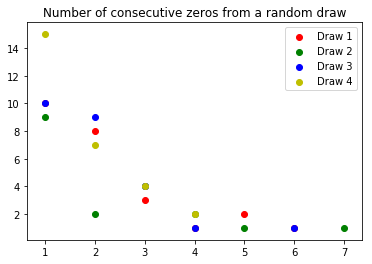

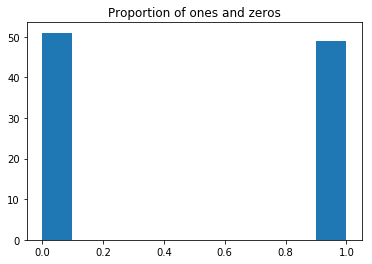

2 raised to the 7 is 128 times the original bet amount - and I may get even more unlucky...


In [2]:
import numpy as np
import matplotlib.pyplot as plt

colors = ["r","g","b","y"]

seeds = [1,2,3,4]

for counter in range(len(seeds)):
    state = np.random.RandomState(seeds[counter])

    random_array = state.choice([0,1],(100))

    c = np.concatenate([np.cumsum(c) if c[0] == 1 else c for c in np.split(random_array, 1 + np.where(np.diff(random_array))[0])])
    counts = {}

    previous_zero = True

    for i in c[::-1]:
        if i !=0:
            if previous_zero == True:
                try:
                    counts[i]+=1
                except:
                    counts[i]=1
            previous_zero = False
        else:
            previous_zero = True

    x = list(counts.keys())
    y = list(counts.values())

    plt.scatter(x,y,c=colors[counter])
    
    #Watch the list comprehension at work! http://www.pythonforbeginners.com/basics/list-comprehensions-in-python
    plt.legend(["Draw "+str(i) for i in seeds])

print()
print("Length of draws: ",len(random_array))
    
plt.title("Number of consecutive zeros from a random draw")
plt.show()

plt.title("Proportion of ones and zeros")
plt.hist(random_array)
plt.show()

print("2 raised to the 7 is 128 times the original bet amount - and I may get even more unlucky...")


### Insufficient data

If I only draw from one specific part of the data distribution and set up a hypothesis based on that, I can become unable to say anything relevant about the "other" parts, which could be quite radically different!


What is the difference between the two datasets? - Well, on this part, not much...


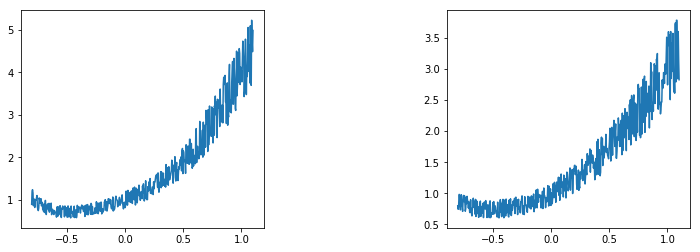

Albeit if we look at it on a further part!!


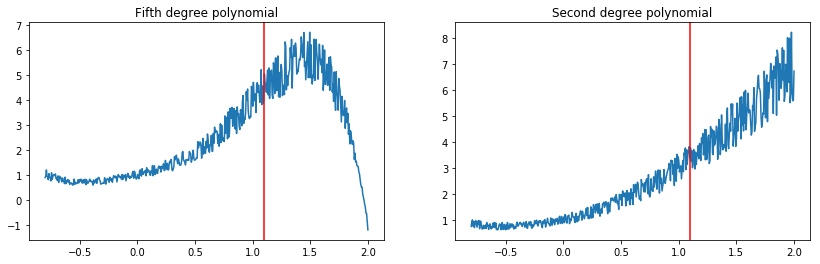

In [3]:
import matplotlib.pyplot as plt
import pylab

pylab.rcParams['figure.figsize'] = (12, 4)

def generate_poly_base(degree, min=-0.8, max=1.1, num=500, lastneg=True, regularize=False):

    coefs = np.ones(degree+1)
    if regularize:
        coefs = [co*0.000000001 for co in coefs]
        
        coefs[0] = 1.0
        coefs[1] = 1.0
        coefs[2] = 1.0

    if lastneg:
        coefs[-1] = -1.0*coefs[-1]
    x1=np.linspace(min,max,num)
    x2=np.zeros(x1.shape)
    
    for d in range(degree+1):
        x2+=coefs[d]*(x1**d)
    
    x2=x2+x2*np.random.uniform(low=-0.2, high=0.2,size=len(x2))
    
    return np.array([x1,x2])


print("What is the difference between the two datasets? - Well, on this part, not much...")

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

m1 = generate_poly_base(5)
ax1.plot(m1[0],m1[1])


m2 = generate_poly_base(2, lastneg=False)
ax2.plot(m2[0],m2[1])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.75, hspace=None)
plt.show()
plt.close()


pylab.rcParams['figure.figsize'] = (14, 4)
print("Albeit if we look at it on a further part!!")
fig, ((ax3, ax4)) = plt.subplots(nrows=1, ncols=2)

m1 = generate_poly_base(5,max=2.0)
ax3.plot(m1[0],m1[1])
ax3.axvline(x=1.1, c="r")
ax3.set_title("Fifth degree polynomial")


m2 = generate_poly_base(2,max=2.0 ,lastneg=False)
ax4.plot(m2[0],m2[1])
ax4.axvline(x=1.1, c="r")
ax4.set_title("Second degree polynomial")

plt.show()




It is extremely hard to cope with this phenomena, getting more data MIGHT help, but...
We have to get used to it.

### Competing models

<a href="http://drive.google.com/uc?export=view&id=1TSLk63Twvizwj9vt_ARbaElePBnuRZqV"><img src="https://drive.google.com/uc?export=view&id=1if2mWlOXcVu0tWOKuAlb8UY_esrszP3Q"></a>


**$X^1+X^2=y$**

or 

**$X^1*X^2-X^2/2=y$**

…
Which is "true"?

### There are potentially infinite number of models

Very unpleasant topic:
**["Can There Be Infinitely Many Models Equivalent to a Given Covariance Structure Model?"](https://pdfs.semanticscholar.org/6f1e/c2919cd69b76e7dfeb4362f370fed49ef0cb.pdf)**

### On the other hand, searching hard enough, we can find correlation between anything and everything

### ["Spurious correlations"](http://www.tylervigen.com/spurious-correlations)

<a href="http://drive.google.com/uc?export=view&id=1-eWlwgsldX0jmIGKCtAvqHYhJTf8tjhW"><img src="https://drive.google.com/uc?export=view&id=1PW9NpcFmmjedMEcoua4LMalNCDAUBqRg"></a>


### Limitations of descriptive statistics

Descriptive statistics can themselves be rather misleading, since they "abstract away" much information from the dataset, keeping only some features.

For example in the cases below, with respect to the two coordinates, all of the point distributions share nearly all standard descriptive statistical properties.

<a href="https://d2f99xq7vri1nk.cloudfront.net/DataDino-600x455.gif"><img src="https://drive.google.com/uc?export=view&id=1Ml8yz--UgJee_v75_PyTiCPtItTXIGX0" width=55%></a>

The real challenge in machine learning is to get the right type and amount of abstraction, that leads to further good predictive value (generalization). (More on this later.)

Source: [Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing](https://www.autodeskresearch.com/publications/samestats)


### Problems with repeated hypothesis testing

The traditional "goodness of fit" type statistics based on *p* values only tell us how unlikely it is that a given hypothesis is true by chance. We saw that if we repeatedly test hypotheses after each-other, "significant p-values" could and will occur by chance or due to local relationships in the data. These relationships are not useful for prediction!


Reproducibility of scientific studies:
- Clinical sciences: : > 50% of studies in the clinical sciences may not be reproducible (Ioannidis, 2005)
- Top psychological journals: Open Science Project: 39 out of 100 studies reproduce (reproduced 100 studies)
- Strategic management: 24-40% of studies not be reproducible (Goldfarb & King 2016)

An example:
- N hypotheses, all independent
- Assume each of these hypotheses is tested on a separate  subset of data 
- Probability of rejecting at least one true null hypothesis is p = $1 - (1 - α)^n$
- n = 1 and α = 0.01 we have, p = 0.01. 
- n=100, α = 0.05     => p = 0.9941 
- Some “proven results” are wrong”

This is also quite unpleasant in general for matters of scientific progress and truth.

More:
- [Testing too many hypotheses](http://www.spencergreenberg.com/2011/10/testing-too-many-hypotheses/)
- [Why Most Published Research Findings Are False](http://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.0020124)


----

### Important note:



<font size="5" color="red">"All models are wrong but some are useful" - <a href="https://en.wikipedia.org/wiki/All_models_are_wrong">George Box</a></font>


We will spend a great deal of time investigating what makes a model useful.



## How to make them useful?

### [Holdout method (aka. train-valid-test split)](https://en.wikipedia.org/wiki/Training,_test,_and_validation_sets#Holdout_dataset)

### Train-test split
- Target: estimate of "fit" outside the training
- **Randomly choose** to "hold out" part of the data (don't let the model see it for training)
- After training is finished, we predict on the data, and use the measured metric as an estimate of generalization

Now this brings us _something_, but two criticisms apply:
1. Only _one_ point estimate of the possible generalization error distribution (cross-validation will try to mitigate this a bit)
2. In real life no change in patterns for new data, e.g. covariance shift -> training data representative of future 

Pure empirical risk minimization cannot help here (covariance shift, out of sample changes)

Yet there may be mechanisms to improve out of sample generalization which we will learn throughout class


### Train-valid-test split

- Tempted - rightfully - to modify some hyperparameters (or even choose a different model) in light of test result
- Hypterparameter: parameter, whose value is set before learning
- If we do so, test influences (contaminates) the training
- -> No longer be regarded as an unbiased estimate of performance. 
- -> Do a threefold split:
- **Train data:** as name implies, use it for training
- **Validation (valid) data:** use it for hyperparameter tuning and model selection
- **Test data:** Use it ONLY once for the final estimate of goodness when nothing else is changed anymore



<a href="https://dziganto.github.io/assets/images/train-validate-test.png?raw=true"><img src="https://drive.google.com/uc?export=view&id=1Fg8MBBU9nckaWGzY8C8NC6zBY7__65xP"></a>

[source](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/)

**Warning: 
- Nomenclature sometimes mixed up 
- Some people call test valid and vice versa 
- Will stick to above definition.**

**Advice: for random choice and splitting use `sklearn.model_selection.train_test_split`**

### Detour: Measuring time series goodness - No shuffling, please!

As always we should seprate training and test data, with the help of `train_test_split` from Scikit.

It is of paramount importance though, that we disable the random shuffling of the dataset, which is _on by default_ so that we preserve the temporal patterns! 

**Validation of time series models is a bit trickier than in the normal regression case.**


For a good summary see:
[How To Backtest Machine Learning Models for Time Series Forecasting](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/)

1. Train-Test split that respect temporal order of observations.
2. Multiple Train-Test splits that respect temporal order of observations.
3. Walk-Forward Validation where a model may be updated each time step new data is received.

As well as [this](https://blog.insightdatascience.com/whats-wrong-with-my-time-series-model-validation-without-a-hold-out-set-94151d38cf5b) in depth blogpost, together with [this](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.30.6748) and [this](https://www.mathworks.com/help/econ/rolling-window-estimation-of-state-space-models.html) papers.


### K-Fold-Cross-validation

- Iterative estimate of model performance 
- Repeatedly ($k$ times) leave out a part of the dataset and do the teaching, 
- Finally estimating the performance as the average "goodness"

<a href="https://i.stack.imgur.com/LttqQ.png"><img src="https://drive.google.com/uc?export=view&id=1ICN1POksXyrJMugG10JYtLyCGhAKkUQs" weights=500 heigth=500></a>

Cross validation can also be used with train-valid-test split

<a href="https://i.stack.imgur.com/0SQJq.png"><img src="https://drive.google.com/uc?export=view&id=1iXwDAhNi9_N2dWZJJ6u7SWOLWQwLOTYy" weights=500 heigth=500></a>

[source](https://stats.stackexchange.com/questions/338044/what-is-exact-way-to-do-k-fold-validation)

__Not really ideal for time series__ sice it does not respect 


### Alternative: walk forward validation

<img src="http://drive.google.com/uc?export=view&id=1SXBdKyeE1N-bwddZ2KoODX6XQQRvukgJ" width=50%>

With this method we simulate, that more and more data is getting available with the passage of time, hance we are retraining our models accordingly. 

## Words of warning:
**IMPORTANT:
_NEVER_ use Test for anything else just look at it once at the end and either we launch the deployment or not!**

### Accidental contamination

**Source: [here](https://rapidminer.com/blog/learn-right-way-validate-models-part-4-accidental-contamination/)**

Three good examples for contamination:

#### 1. By normalization

- Normalization of data before train-valid-test split 
- Normalization: adjusting vlaues of different scale to notially common scale (e.g. deviation from mean)
- "Carry back" the mean, min or max information of the test part to the whole data. 
- This either hurts or not, but it is better to be conscious about it

#### 2. By hyperparameter optimization on test data

- Choose a hyperparameter for the original training that looks good on test
- **[Selection bias](https://en.wikipedia.org/wiki/Selection_bias)** so I will in the end fit the model to my choice
- Same logic as overfitting


#### 3. By feature selection based on test data

- Only choose / select the features that are appropriate in regard to the test
- Then I don't have a test anymore

Personal anecdote:

<a href="http://drive.google.com/uc?export=view&id=19VoYBU4-LWOqh4NCEzXz95jYmp5OZhm2"><img src="https://drive.google.com/uc?export=view&id=18oEO-8RCvg4EwOA5txoBpT31B3sdyXUb" weights=500 heigth=500></a>

## The REAL problem

"Covariate shift" is a general and rather nasty problem, when the distribution of your input shifts in a subtle way, implying that the learned model is no longer appropriate.

<a href="http://slideplayer.com/slide/5237435/16/images/5/Covariate+Shift+Adaptation.jpg"><img src="https://drive.google.com/uc?export=view&id=1K8nzgHkRO1MSpenw2iYnu4_zgYsD1H2D" width=700 heigth=700></a>

If we can realize this - eg. with testing in time, or with performance monitoring "a bit late" - we can try to re-train the model. (See eg. ["importance sampling"](https://en.wikipedia.org/wiki/Importance_sampling), or some kind of transfer learning, as elaborated later).

More about detecting covariate shift can be found [here](https://datascience.stackexchange.com/questions/8278/covariate-shift-detection).

### What can we do?

Observe error. 

Retrain.

Pray.


## Sharks eating ice cream

Why pray?

Well, let us look at the classic case of [Granger causality](https://en.wikipedia.org/wiki/Granger_causality):

<img src="http://drive.google.com/uc?export=view&id=1rS6uwrg6xxtqOVjcUxUPwnmtdIKUONXb" width=50%>

One could think - and even show with said test - that the spike in the first time series preceeds the secodn pretty confidently. But does this mean any causal connections?

Not at all necessarily!


<img src="http://drive.google.com/uc?export=view&id=1a7a1N8UEyoU0qsQ_Q_5pLkSHV2bnZ3iO" width=50%>

<img src="http://drive.google.com/uc?export=view&id=1sCBjRjQs91iH7QYrHPTq167ZjITI7fK0" width=50%>

[source](https://axbit.com/en/blog/The_hidden_risk_of_AI_and_Big_Data)


__If we did not capture the real causality - the latent vaiable in our model, we can only hope for stability.__

This is why causal machine learning is a crucial area of investigation.

# II. "Pray for change!"

## (Un)predictable?

### Where are we?

<img src="https://www.popsci.com/uploads/2019/03/18/6W6YNTLPQDPZBI5FP4IYNKILSI.jpg" width=35%>

Albert László Barabási

"By combining movement data with entropy figures, Barabási and Song found that they could predict a person’s location, within a square mile, with __up to 93 percent accuracy. No one,__ not even those who traveled frequently outside their usual circuit, __was less than 80 percent predictable.__"

[source](https://www.popsci.com/science/article/2011-10/man-could-rule-world/)

<img src="https://images-na.ssl-images-amazon.com/images/I/5162DI2TRkL._SX330_BO1,204,203,200_.jpg" width=35%>

[Bursts: The Hidden Patterns Behind Everything We Do, from Your E-mail to Bloody Crusades](https://www.amazon.com/Bursts-Patterns-Everything-mail-Crusades/dp/0452297184)


### What is going to hapen in our lives?

<img src="https://imageio.forbes.com/blogs-images/kashmirhill/files/2012/02/Target-pregnancy.jpg?fit=bounds&format=jpg&width=252" width=35%>

'“My daughter got this in the mail!” he said. “She’s still in high school, and you’re sending her coupons for baby clothes and cribs? Are you trying to encourage her to get pregnant?”

The manager didn’t have any idea what the man was talking about. He looked at the mailer. Sure enough, it was addressed to the man’s daughter and contained advertisements for maternity clothing, nursery furniture and pictures of smiling infants. The manager apologized and then called a few days later to apologize again.


On the phone, though, the father was somewhat abashed. “I had a talk with my daughter,” he said. “It turns out there’s been some activities in my house I haven’t been completely aware of. She’s due in August. I owe you an apology.”'

[How Target Figured Out A Teen Girl Was Pregnant Before Her Father Did](https://www.forbes.com/sites/kashmirhill/2012/02/16/how-target-figured-out-a-teen-girl-was-pregnant-before-her-father-did/)


### Who are we?

<img src="http://drive.google.com/uc?export=view&id=17OfgLPIVwP5qOHhqNNa1OcLGiyPIQkEG" width=55%>

"With just 10 likes, a computer model fundamentally knows you better than a colleague, according to additional research published by Kosinski in 2015. With 70 likes, it knows you better than a friend or roommate; with 150 likes, better than a family member. And with 300 likes, Big Data knows you better than your spouse."

[How Facebook 'likes' predict race, religion and sexual orientation](https://edition.cnn.com/2018/04/10/health/facebook-likes-psychographics/index.html)

## What can be done? 

### Technically

<img src="http://drive.google.com/uc?export=view&id=1nVcDJtBfaJXa6D3LtN7T3GT5Hm-A8zaO" width=65%>

<img src="http://drive.google.com/uc?export=view&id=18YEzPcdOeDWWxnlWtgyi2Pw2pXpPE0JL" width=30%>

### Behaviorally

There are myriad ethical frameworks and approaches, like the [The European approach to trustworthy AI](https://ec.europa.eu/commission/presscorner/detail/en/IP_21_1682), which are to be studied and regarded.

But maybe there is a deeper connection between trust and safety that we should consider.

<img src="https://images-na.ssl-images-amazon.com/images/I/41LgrRqVBjL._SX312_BO1,204,203,200_.jpg" width=45%>


In his book [Liars and Outliers: Enabling the Trust that Society Needs to Thrive](https://www.amazon.com/Liars-Outliers-Enabling-Society-Thrive/dp/1118143302) the author describes all security technologies as that of inducing trust. Trust being the final goal and the way for cooperation, which is te source of all wealth and prosperity. With this in mind, we can connect our endeavors of trustworthiness and technological safety with some core pronciples: __cooperation__.

<img src="http://drive.google.com/uc?export=view&id=1xEvvjzo0UQnS-pb_xBXYO4dP3M2EWF3M" width=45%>

If we don't want to be stuck in prisonner's dilemma ("zero sum") games and necessarily realize sub optimal ("Nash") equilibria, we have to enable trust and cooperation. And even if that is not so easy or even not rational, a guide moral (or intelligently selfish?) guideline is to choose cooperation. 

## What can be hoped for?

Is there always such a choice? Isn't the universe a closed, fully predictable, "hopeless" system of mechanics?

Let us hope and trust in some ever existent shimmers of freedom!

[Dune: the golden path](https://www.youtube.com/watch?v=F6q6a1-DwEg)

“In all of my universe I have seen no law of nature, unchanging and inexorable. This universe presents only changing relationships which are somtimes seen as laws by short-lived awareness. These fleshy sensoria which we call self are ephemera withering in the blaze of infinity, fleetingly aware of temporary conditions which confine our activities and change as our activities change. If you must label the absolute, use its proper name: Temporary.”
― Frank Herbert, God Emperor of Dune 


“For what do you hunger, Lord?” Moneo ventured.
“For a humankind which can make truly long-term decisions. Do you know the key to that ability, Moneo?”
“You have said it many times, Lord. It is the ability to change your mind.”
― Frank Herbert, God Emperor of Dune 

“Dangers lurk in all systems. Systems incorporate the unexamined beliefs of their creators. Adopt a system, accept its beliefs, and you help strengthen the resistance to change”
― Frank Herbert, God Emperor of Dune 

“Chance is the nature of our universe. […] madness represents a chaotic reservoir of surprises. Some surprises can be valuable.”
― Frank Herbert, God Emperor of Dune 

“Paradox is a pointer telling you to look beyond it. If paradoxes bother you, that betrays your deep desire for absolutes. The relativist treats a paradox merely as interesting, perhaps amusing or even, dreadful thought, educational.”
― Frank Herbert, God Emperor of Dune 

“The more I find out, the more I realize that I don't know what's going on."
"How fortunate that you have discovered the way of wisdom," Leto said.”
― Frank Herbert, God Emperor of Dune 

"What am I eliminating? The bourgeois infatuation with peaceful conservation of the past. This is a binding force, a thing which holds humankind into one vulnerable unit in spite of illusionary separations across parsecs of space. If I can find the scattered bits, others can find them. When you are together, you can share a common catastrophe. You can be exterminated together. Thus, I demonstrate the terrible danger of a gliding, passionless mediocrity, a movement without ambitions or aims. I show you that entire civilizations can do this thing. I give you eons of life which slips gently toward death without fuss or stirring, without even asking “Why?” I show you the false happiness and the shadow-catastrophe called Leto, the God Emperor. Now, will you learn the real happiness?"
— Frank Herbert, God Emperor of Dune 